In [1]:
import os
import sys

sys.path.append("../python")

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from data import Dataloader
from models import RandomExampleModel,TwoClustersMIP
import metrics

In [5]:
# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y= data_loader.load()
df= X-Y
Z=np.load("../data/dataset_10/Z.npy")

Adjusted Rand Index: 0.4843354568015668


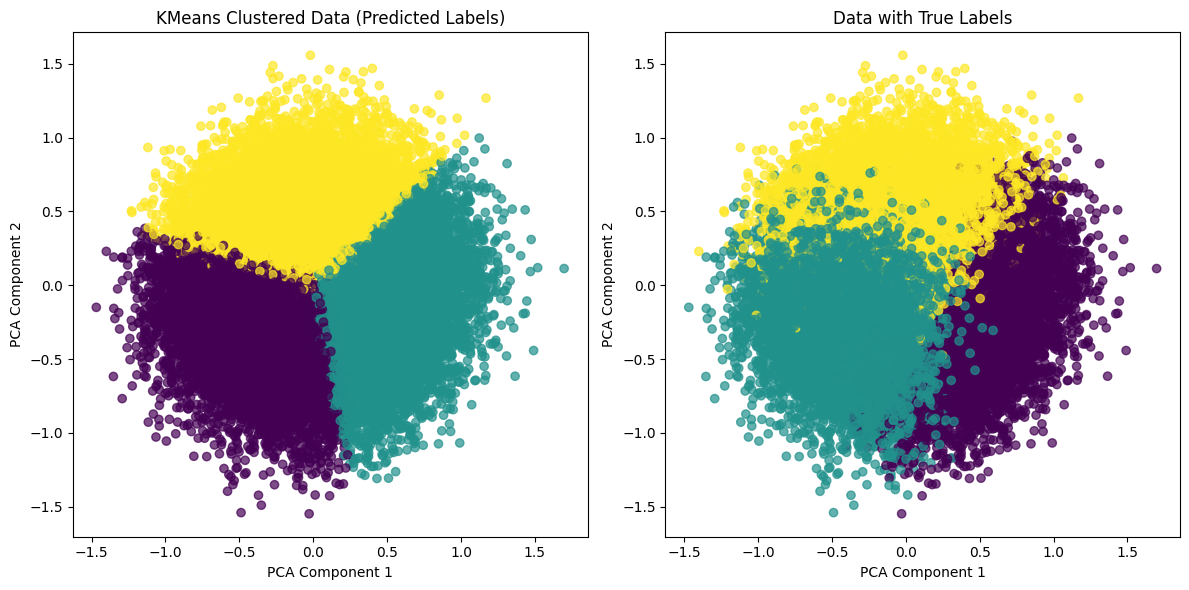

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

# Loading the data
data_loader = Dataloader("../data/dataset_10") # Specify path to the dataset you want to load
X, Y= data_loader.load()
df= X-Y
Z=np.load("../data/dataset_10/Z.npy")

# Assuming you have your data as 'data' and ground truth labels as 'ground_truth_labels'

# Create KMeans instance for 3 clusters with seed for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit_predict(df)

# Predict the clusters
predicted_labels = kmeans.labels_

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
df_reduced = pca.fit_transform(df)


# Evaluate the performance
score = adjusted_rand_score(Z, predicted_labels)
print("Adjusted Rand Index:", score)


# Plot the reduced data with predicted cluster labels
plt.figure(figsize=(12, 6))

# Plotting with predicted labels
plt.subplot(1, 2, 1)
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=predicted_labels, cmap='viridis', alpha=0.7)
plt.title('KMeans Clustered Data (Predicted Labels)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Plotting with true labels for comparison
plt.subplot(1, 2, 2)
plt.scatter(df_reduced[:, 0], df_reduced[:, 1], c=Z, cmap='viridis', alpha=0.7)
plt.title('Data with True Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

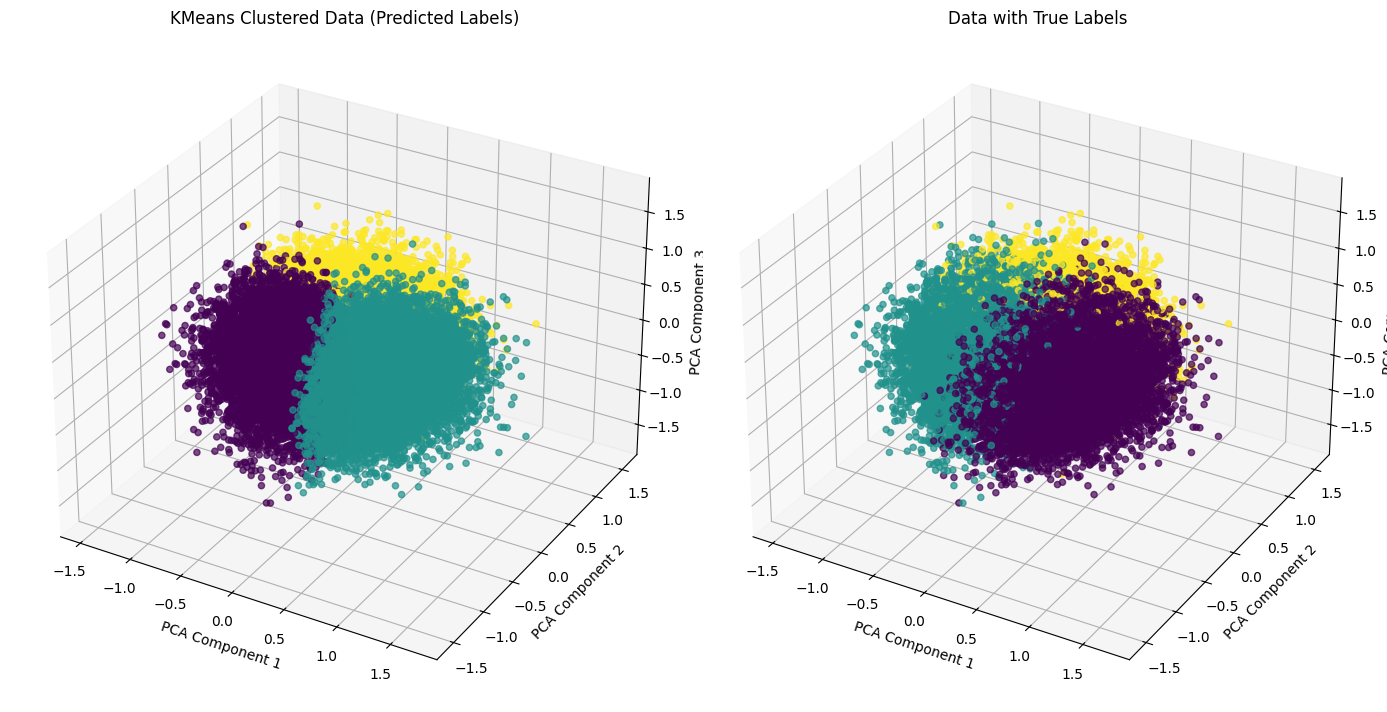

In [7]:
# Apply PCA to reduce to 3 dimensions for visualization
pca_3d = PCA(n_components=3)
df_reduced_3d = pca_3d.fit_transform(df)

# Create 3D plots
fig = plt.figure(figsize=(14, 7))

# Plotting with predicted labels
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(df_reduced_3d[:, 0], df_reduced_3d[:, 1], df_reduced_3d[:, 2], c=predicted_labels, cmap='viridis', alpha=0.7)
ax.set_title('KMeans Clustered Data (Predicted Labels)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Plotting with true labels for comparison
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(df_reduced_3d[:, 0], df_reduced_3d[:, 1], df_reduced_3d[:, 2], c=Z, cmap='viridis', alpha=0.7)
ax2.set_title('Data with True Labels')
ax2.set_xlabel('PCA Component 1')
ax2.set_ylabel('PCA Component 2')
ax2.set_zlabel('PCA Component 3')

plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score

# Assuming your data is in 'data' and ground truth labels in 'ground_truth_labels'

# Create SpectralClustering instance
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors')

# Fit the model
spectral.fit(df)

# Predict the clusters
predicted_labels = spectral.labels_

# Evaluate the performance
score = adjusted_rand_score(Z, predicted_labels)
print("Adjusted Rand Index:", score)